In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.model_selection import train_test_split
#for creating models 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [213]:
data = load_breast_cancer()
# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

In [215]:
df.shape

(569, 30)

In [217]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [219]:
# Add the target column
df['target'] = data.target

In [221]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [225]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [227]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [229]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


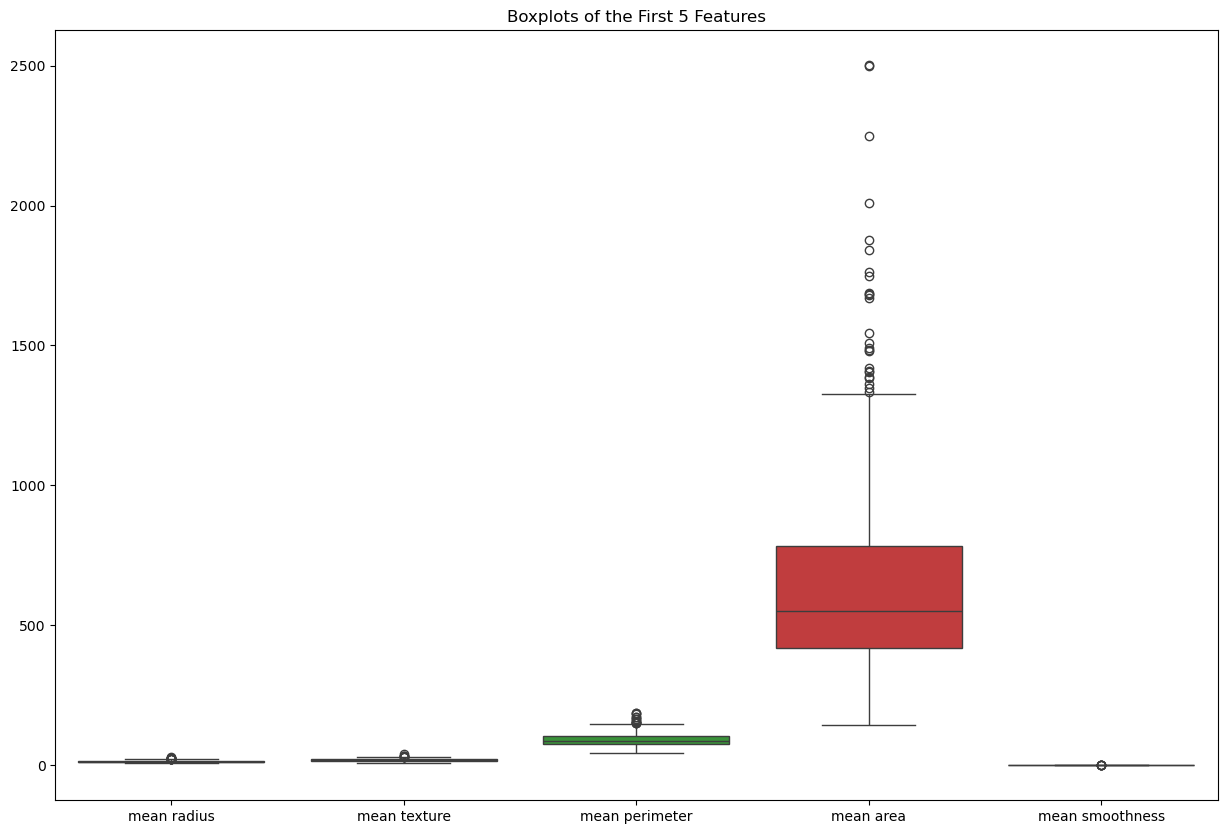

In [233]:
# Plot boxplots for the first 5 features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, :5])
plt.title("Boxplots of the First 5 Features")
plt.show()


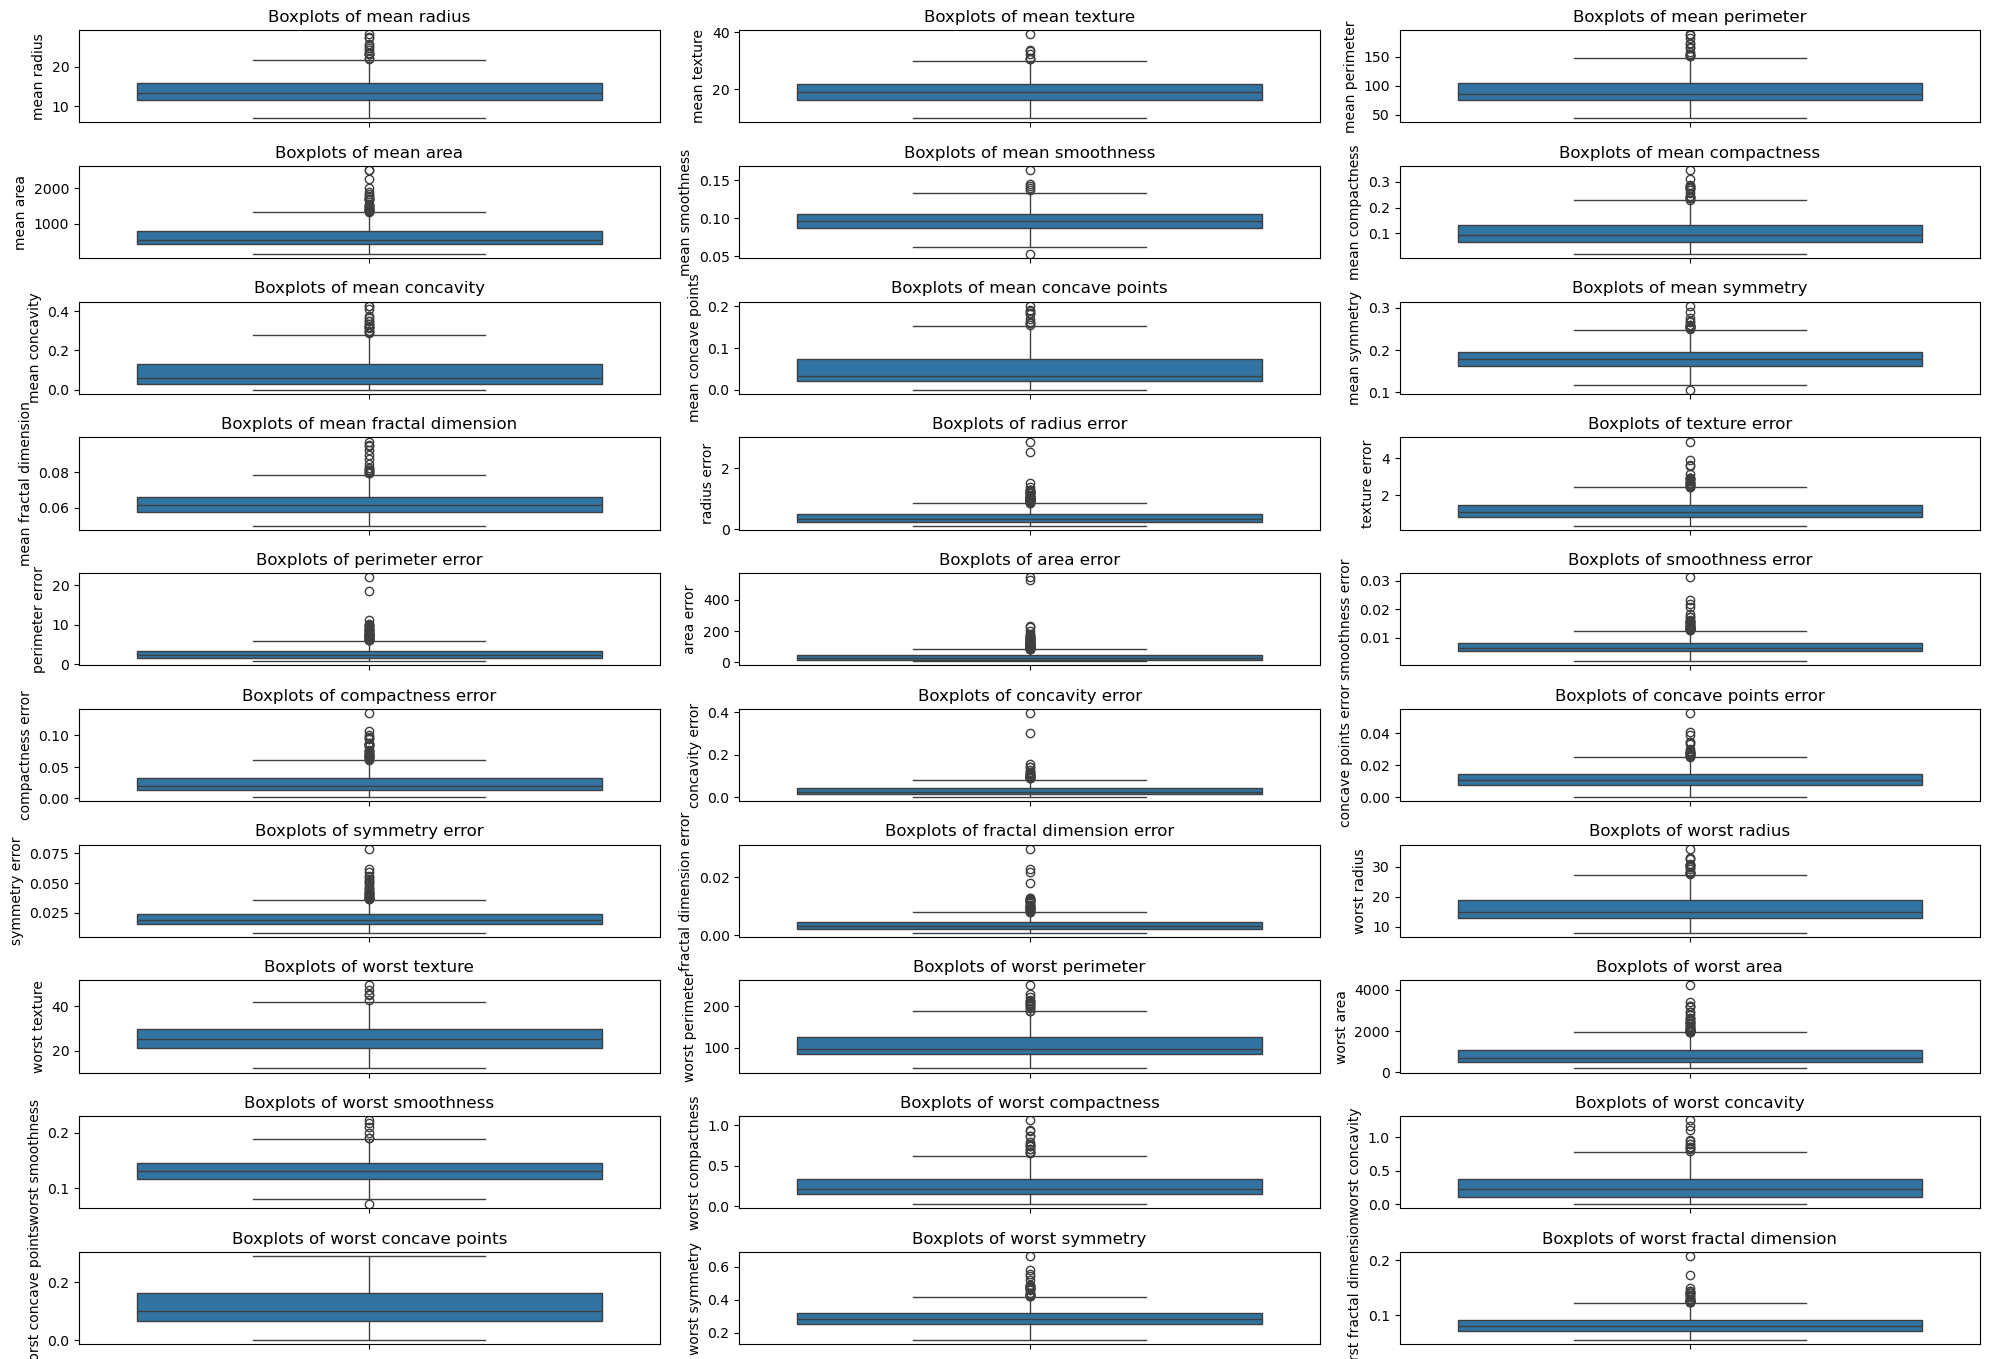

In [235]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.boxplot(data=df,y=column) 
    plt.title(f"Boxplots of {column}")  
    plt.tight_layout()

plt.show()

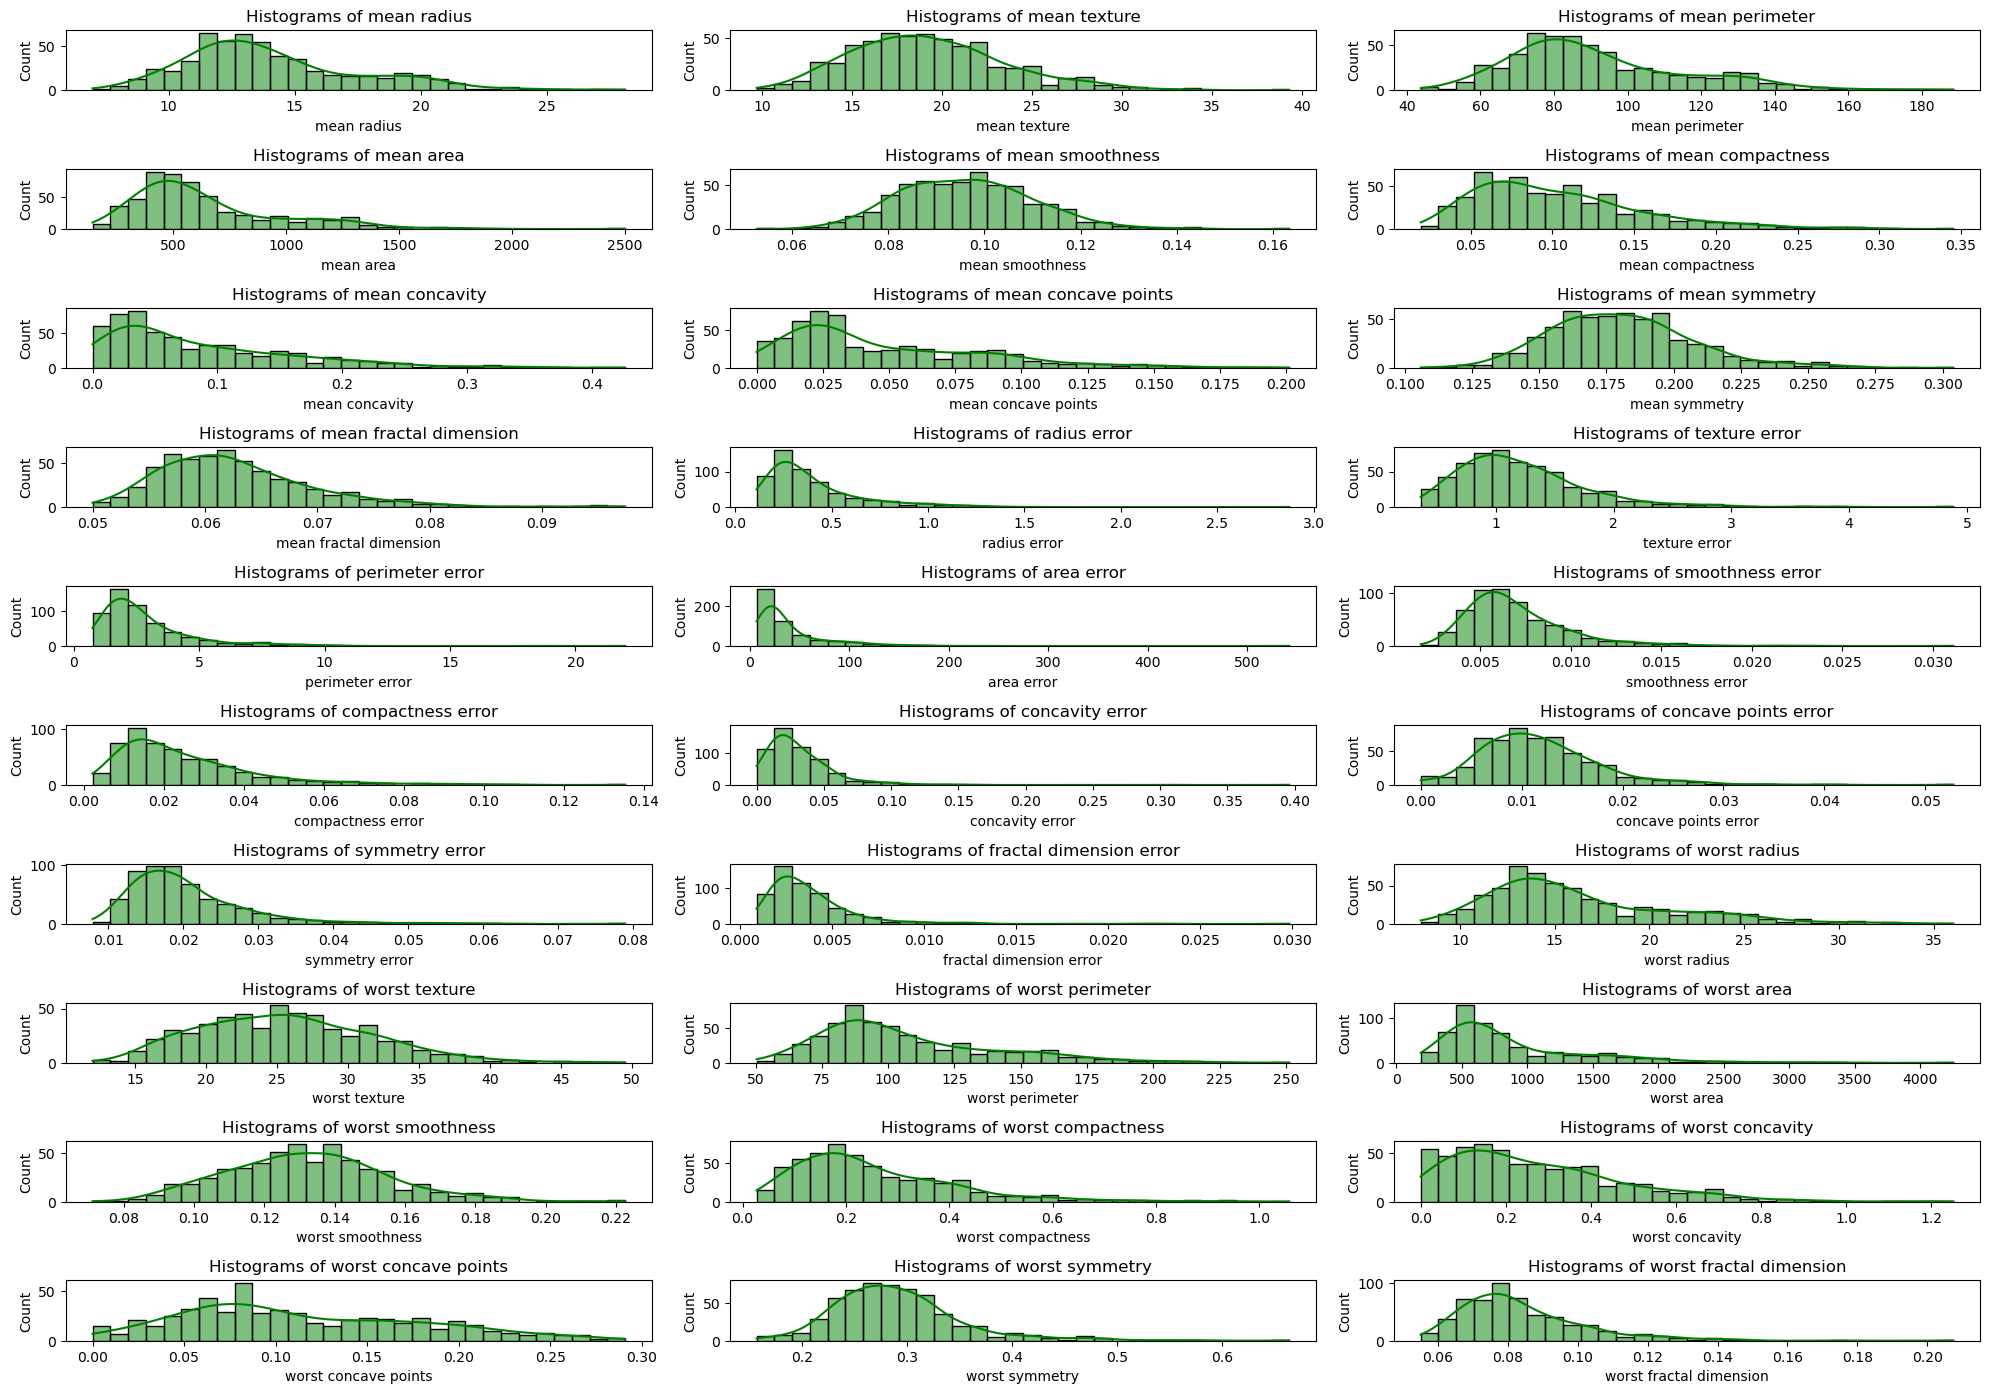

In [237]:
#Histogram
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(20,15))
for i,column in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols)//3+1,3,i)
    sns.histplot(data=df,x=column,kde=True,color='green',bins=30) 
    plt.title(f"Histograms of {column}")  
    plt.tight_layout()

plt.show()


In [239]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df):
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
# Calculate IQR
    IQR = Q3 - Q1
# Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
# Clip the values outside the bounds
    df_clipped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_clipped
# Apply IQR-based outlier handling to the scaled data
df_no_outliers = handle_outliers_iqr(df)
# Display the first few rows of the cleaned data
df_no_outliers.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,0


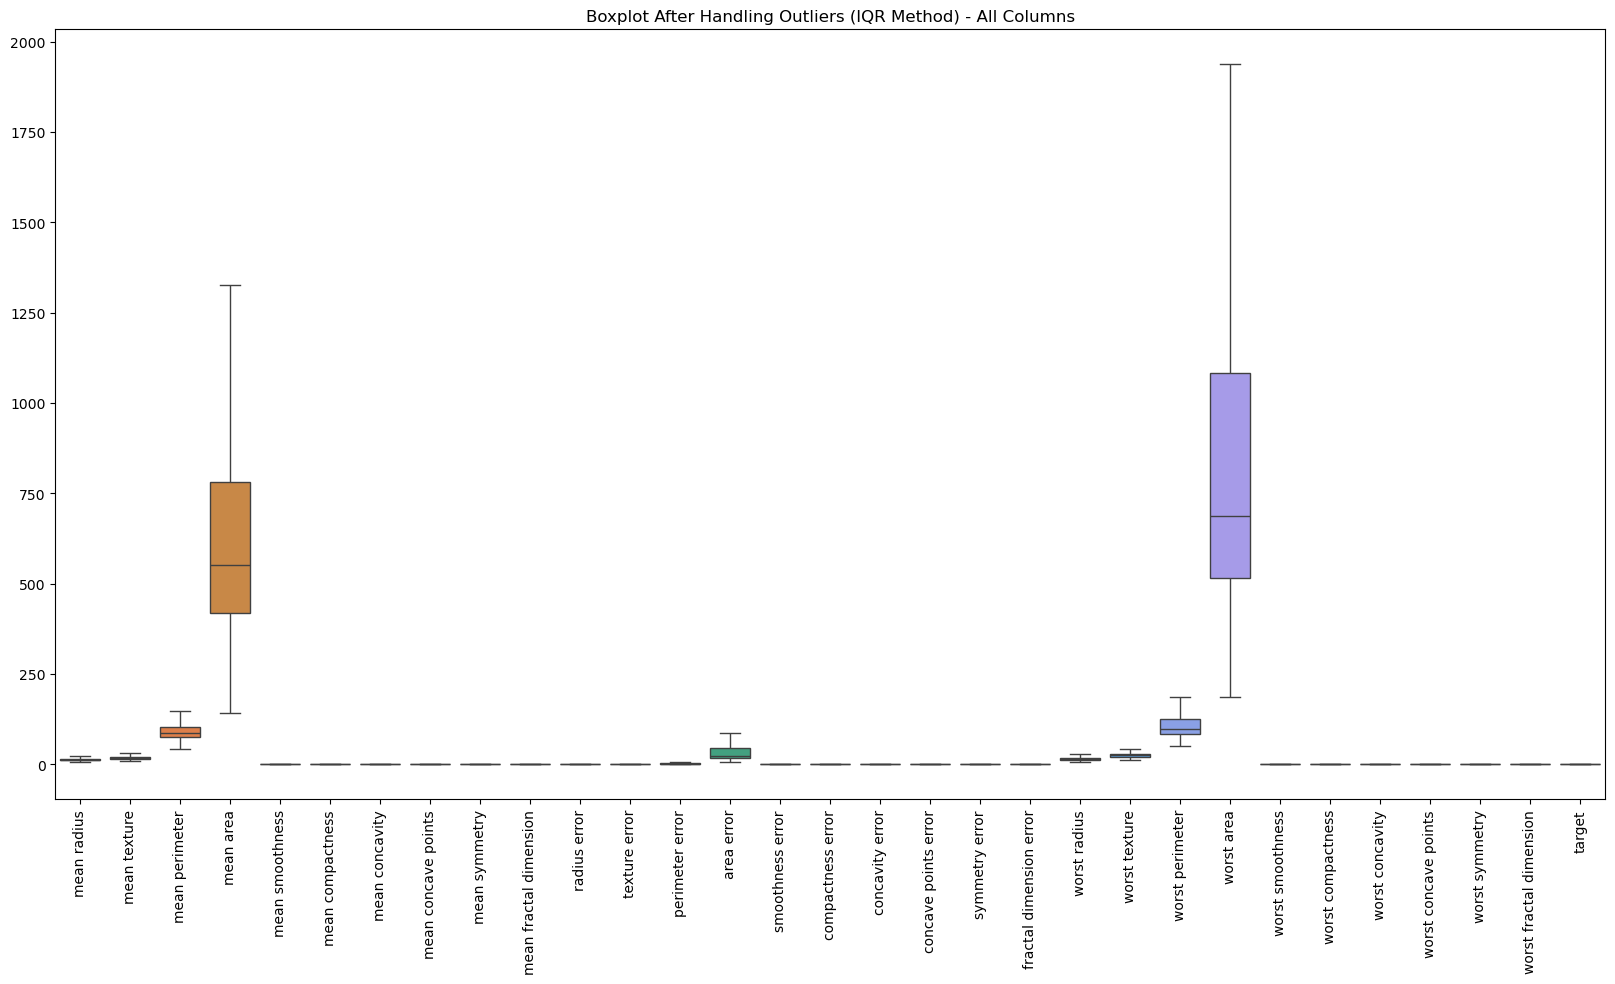

In [241]:
# Plot boxplots for all columns to visualize the effect of outlier handling
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers)
plt.title("Boxplot After Handling Outliers (IQR Method) - All Columns")
plt.xticks(rotation=90) # Rotate column names for better readability
plt.show()

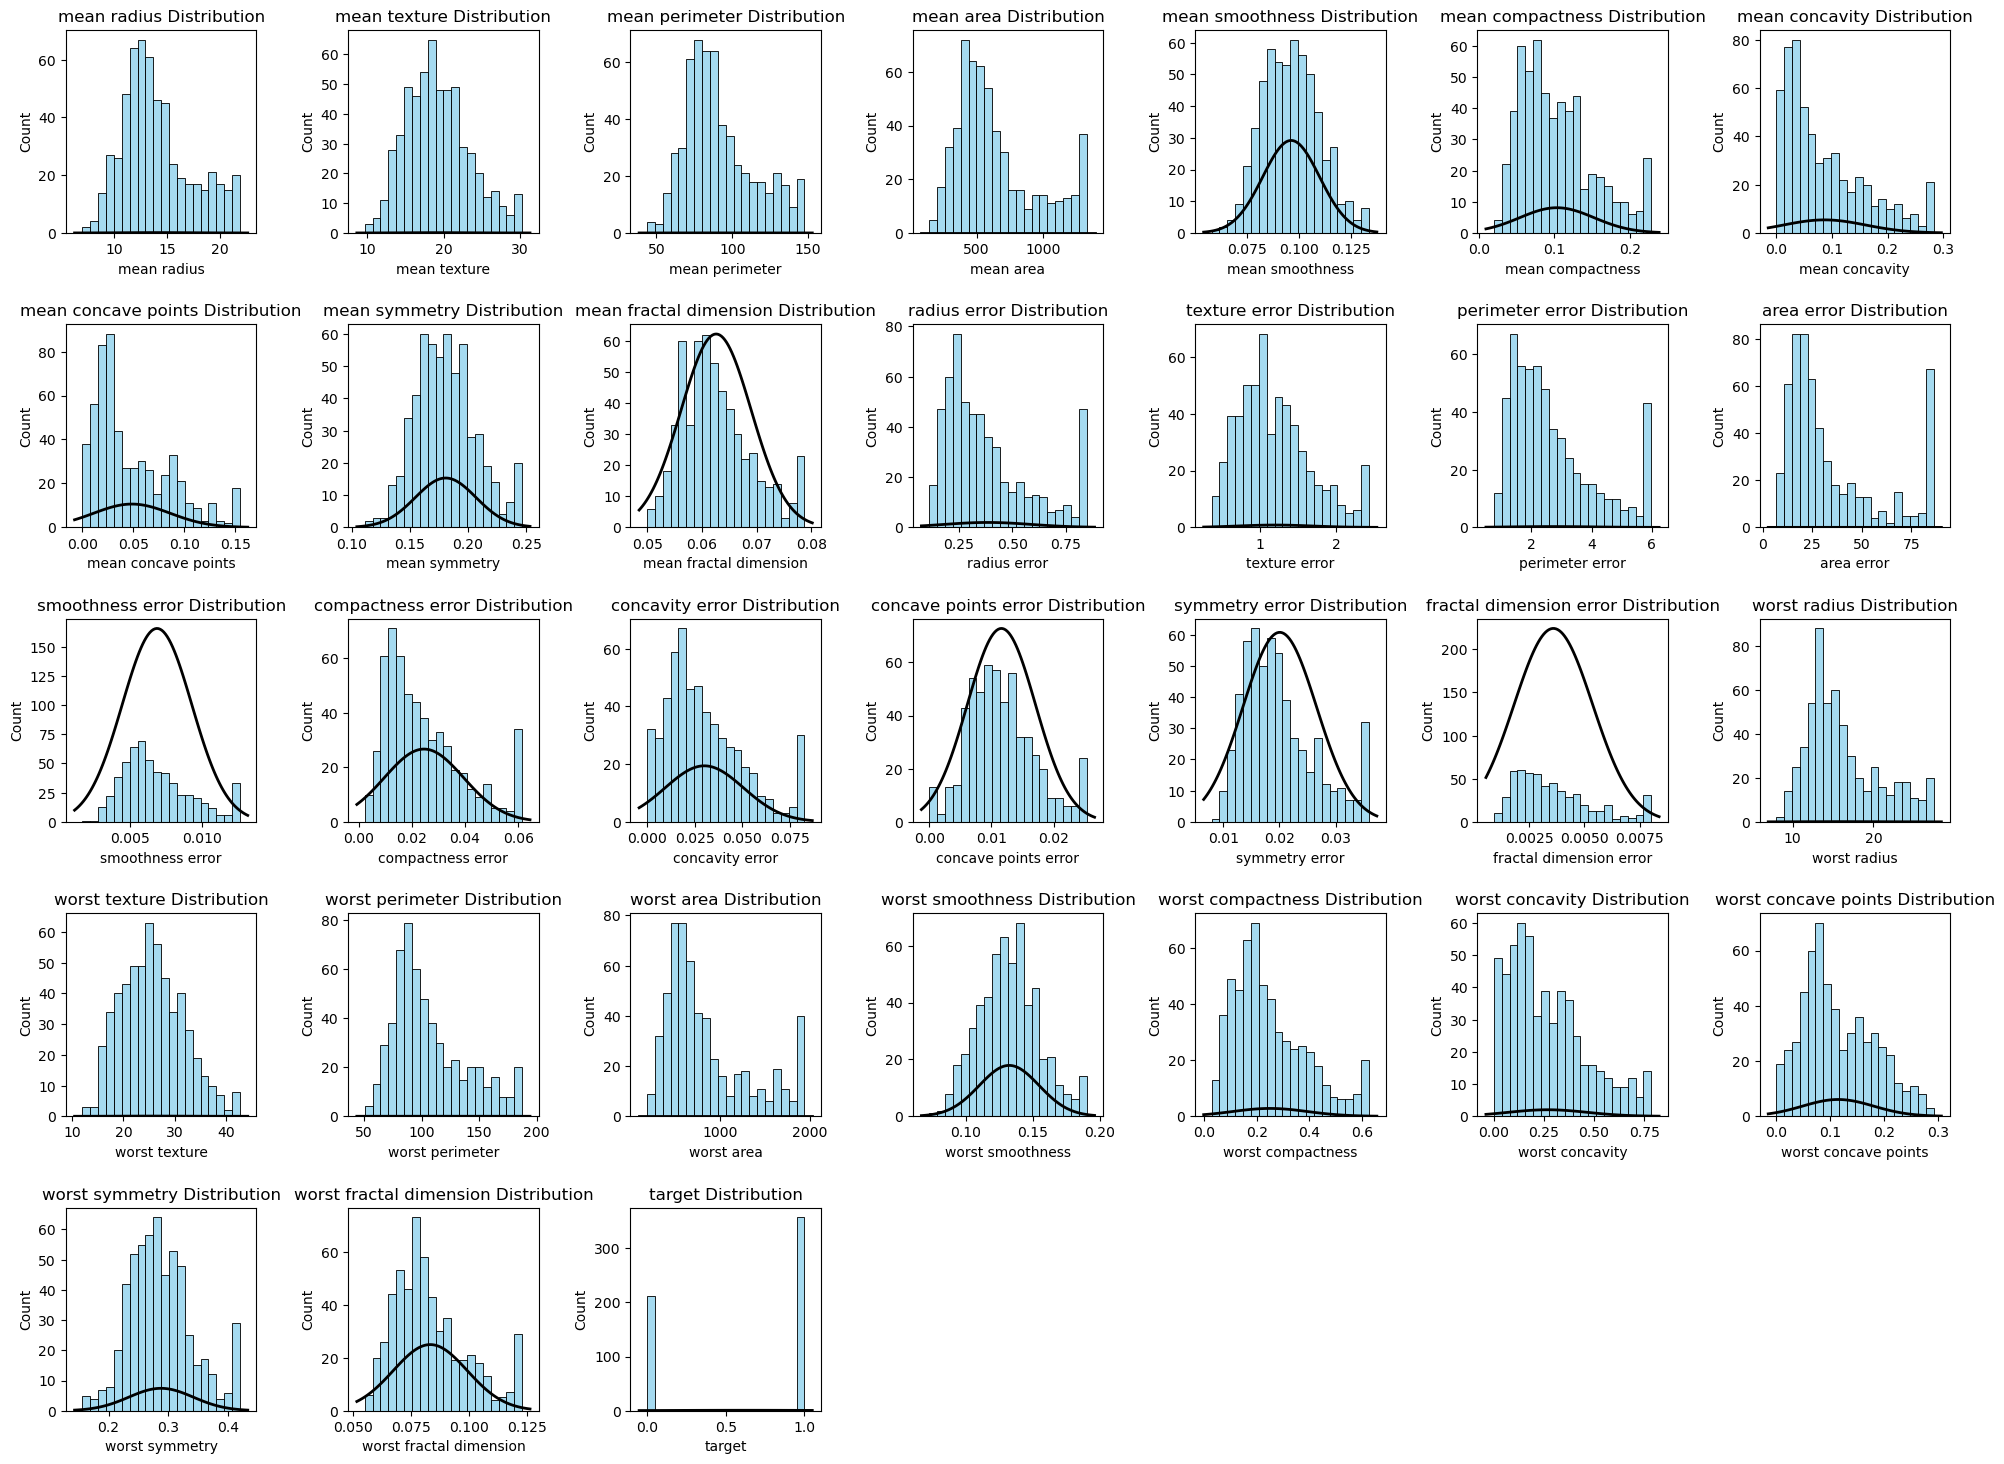

In [243]:
from scipy.stats import norm
import warnings
# Suppress specific UserWarnings (tight_layout)
warnings.filterwarnings("ignore", category=UserWarning, message=".*tight_layout.*")
# Create a figure with subplots for each column (adjust size as needed)
plt.figure(figsize=(20, 15))
# Loop through each column to plot histograms
for i, column in enumerate(df_no_outliers.columns):
    plt.subplot(5, 7, i+1) # 5 rows, 7 columns of subplots (adjust if needed)
# Plot the histogram
    sns.histplot(df_no_outliers[column], kde=False, bins=20, color='skyblue')
# Overlay the bell curve (normal distribution)
    mu, std = norm.fit(df_no_outliers[column]) # Fit a normal distribution
    xmin, xmax = plt.xlim() # Get the current x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std) # Get the probability density function
    plt.plot(x, p, 'k', linewidth=2) # Plot the normal distribution curve
    plt.title(f"{column} Distribution")
# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)
# Show the plot
plt.show()


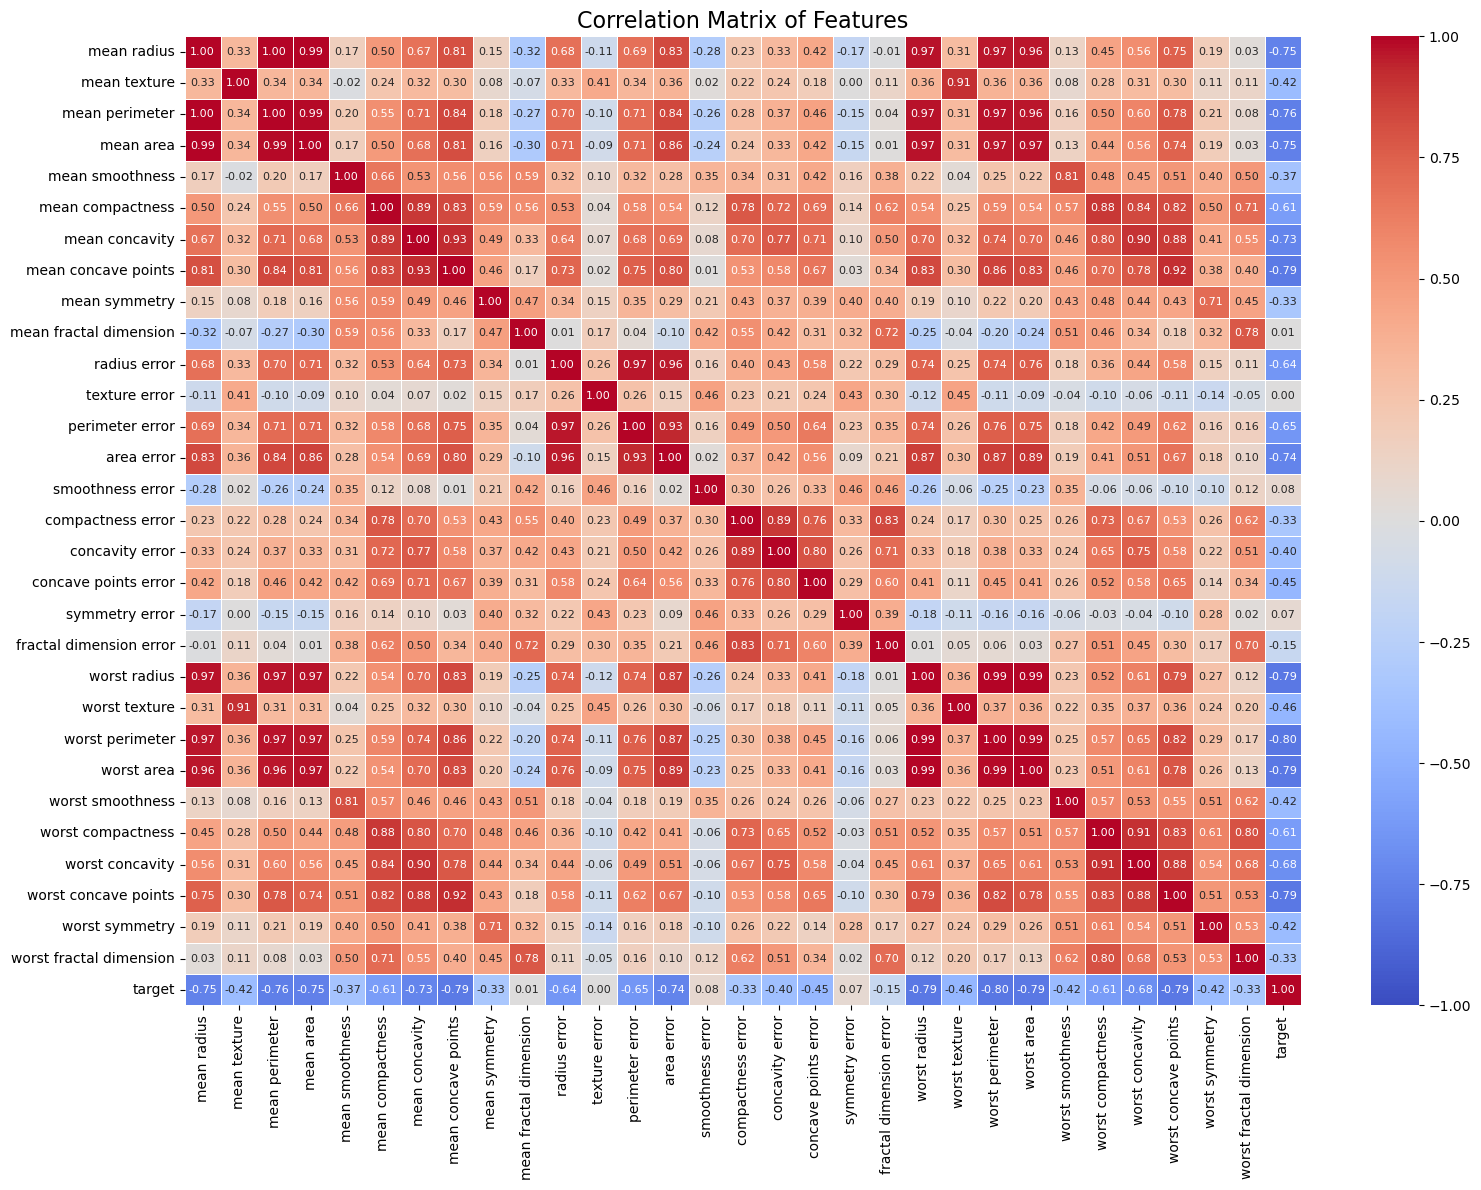

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr_matrix =df_no_outliers.corr()
# Increase the figure size for better readability
plt.figure(figsize=(16, 12)) # Increase the figure size
# Rotate the axis labels for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
annot_kws={"size": 8}, # Reduce font size
vmin=-1, vmax=1) # Set correlation range between -1 and 1
# Title and show plot
plt.title("Correlation Matrix of Features", fontsize=16)
plt.xticks(rotation=90) # Rotate x-axis labels
plt.yticks(rotation=0) # Rotate y-axis labels
plt.tight_layout() # Ensure everything fits in the figure
# Show the plot
plt.show()

In [47]:
#seperate features x and target y
X=df_no_outliers.drop(columns=['target'])
y=df['target']

In [49]:
#Feature Selection
from sklearn.feature_selection import SelectKBest,f_regression,RFE

selector=SelectKBest(score_func=f_regression,k=20)
X_new=selector.fit_transform(X,y)

In [51]:
selected_features=X.columns[selector.get_support()]
feature_score=pd.DataFrame({'features':X.columns,'score':selector.scores_}).sort_values(by='score',ascending=False)


In [53]:
print("Selected Features:",selected_features)
print("\nFeature Scores:")
print(feature_score)

Selected Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concave points error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')

Feature Scores:
                   features        score
22          worst perimeter  1012.338365
23               worst area   971.473689
20             worst radius   966.829905
27     worst concave points   964.385393
7       mean concave points   929.435001
2            mean perimeter   770.546993
3                 mean area   741.521069
0               mean radius   708.155869
13               area error   682.507418
6            mean concavity   636.243499
26          worst concavity   497.312375
12          perimeter error   407.975475
10

In [79]:
X_selected=X[selected_features]
X_selected

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,17.99,10.38,122.80,1001.0,0.22862,0.28241,0.14710,0.84865,5.9835,86.20,0.01587,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.54350,3.3980,74.08,0.01340,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.74560,4.5850,86.20,0.02058,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130
3,11.42,20.38,77.58,386.1,0.22862,0.24140,0.10520,0.49560,3.4450,27.23,0.01867,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.75720,5.4380,86.20,0.01885,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11590,0.24390,0.13890,0.84865,5.9835,86.20,0.02454,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.76550,5.2030,86.20,0.01678,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.45640,3.4250,48.55,0.01557,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180
567,20.60,29.33,140.10,1265.0,0.22862,0.28241,0.15200,0.72600,5.7720,86.20,0.01664,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870


In [85]:
from sklearn.model_selection import train_test_split
# Perform the train-test split
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Verify the shapes of the splits
print("Training Features Shape:", X_train_selected.shape)
print("Testing Features Shape:", X_test_selected.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (455, 20)
Testing Features Shape: (114, 20)
Training Target Shape: (455,)
Testing Target Shape: (114,)


In [87]:
#Scaling
scaler=StandardScaler()

Xtrain_scaled=scaler.fit_transform(X_train_selected)
Xtest_scaled=scaler.fit_transform(X_test_selected)
print(Xtrain_scaled.shape)
print(Xtest_scaled.shape)

(455, 20)
(114, 20)


In [247]:
# Train the model
model_1 = LogisticRegression()
model_1.fit(Xtrain_scaled, y_train)

LogisticRegression()

In [249]:
y_pred = model_1.predict(Xtest_scaled)


In [251]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Axes: >

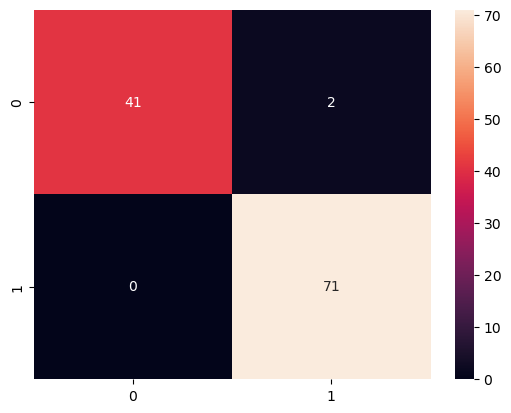

In [253]:
sns.heatmap(conf_matrix, annot=True)

In [255]:
model_2 = DecisionTreeClassifier(random_state = 42,max_depth = 10)
model_2.fit(Xtrain_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [257]:
y_pred_dt = model_2.predict(Xtest_scaled)

In [259]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

Accuracy: 0.9210526315789473
Confusion Matrix:
 [[38  5]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [261]:
model_3 = SVC(probability=True)
model_3.fit(Xtrain_scaled,y_train)

SVC(probability=True)

In [263]:
y_pred_svc = model_3.predict(Xtest_scaled)

In [265]:
# Evaluate the model
accuracy_svc=accuracy_score(y_test,y_pred_svc)
cm_svc=confusion_matrix(y_test,y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)
print("Accuracy:", accuracy_svc)
print("Confusion Matrix:\n", cm_svc)
print("Classification Report:\n", class_report_svc)

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Axes: >

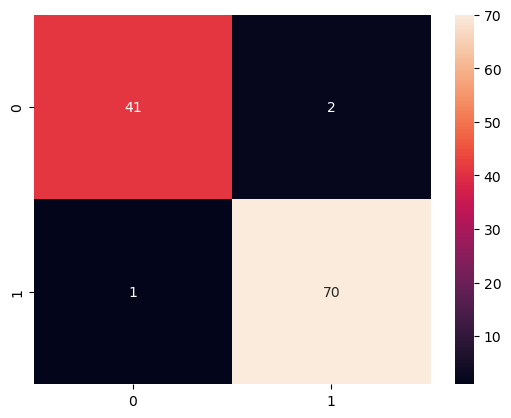

In [267]:
sns.heatmap(cm_svc,annot=True)

In [269]:
fpr,tpr,_=roc_curve(y_test,y_pred_svc)
roc_auc=auc(fpr,tpr)


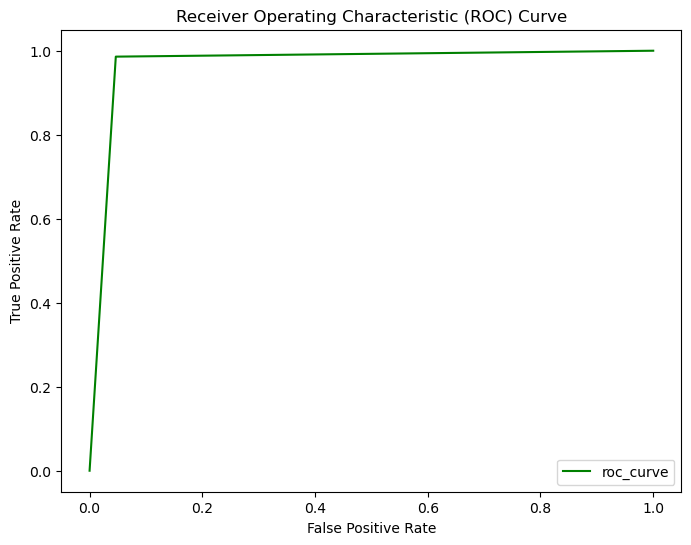

In [271]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='green',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [ ]:
#KNN

In [273]:
model_4=KNeighborsClassifier(n_neighbors=5)
model_4.fit(Xtrain_scaled,y_train)

KNeighborsClassifier()

In [275]:
y_pred_knn=model_4.predict(Xtest_scaled)

In [277]:
# Evaluate the model
accuracy_knn=accuracy_score(y_test,y_pred_knn)
cm_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", cm_knn)
print("Classification Report:\n", class_report_knn)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[40  3]
 [ 2 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [279]:
#roc curve
fpr,tpr,_=roc_curve(y_test,y_pred_knn)
roc_auc=auc(fpr,tpr)

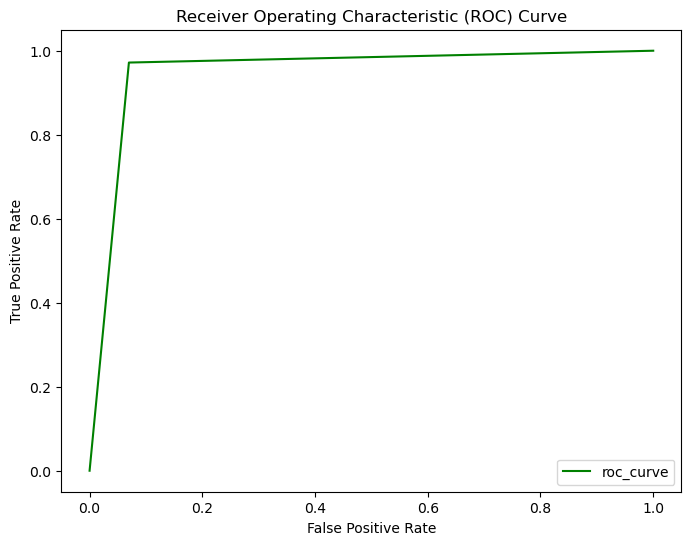

In [281]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='green',label='roc_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [ ]:
#Naive Bayes

In [283]:
model_5=GaussianNB()
model_5.fit(Xtrain_scaled,y_train)

GaussianNB()

In [285]:
y_pred_nb=model_5.predict(Xtest_scaled)

In [287]:
# Evaluate the model
accuracy_nb=accuracy_score(y_test,y_pred_nb)
cm_nb=confusion_matrix(y_test,y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)
print("Confusion Matrix:\n", cm_nb)
print("Classification Report:\n", class_report_nb)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [289]:
#random Forest Model
rf_model=RandomForestClassifier(max_depth=10,random_state=42,n_estimators=100)
rf_model.fit(Xtrain_scaled,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [291]:
y_pred_rf=rf_model.predict(Xtest_scaled)

In [293]:
# Evaluate the model
accuracy_rf=accuracy_score(y_test,y_pred_rf)
cm_rf=confusion_matrix(y_test,y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", class_report_rf)

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [295]:
#Gradient Boosting

gb_model=GradientBoostingClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
gb_model.fit(Xtrain_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [297]:
y_pred_gb=gb_model.predict(Xtest_scaled)

In [299]:
# Evaluate the model
accuracy_gb=accuracy_score(y_test,y_pred_gb)
cm_gb=confusion_matrix(y_test,y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", cm_gb)
print("Classification Report:\n", class_report_gb)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [301]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(Xtrain_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(Xtest_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

#Model Comparison
print("\nModel Comparison:\n")
for name, accuracy in results.items():
    print(f"{name}: {accuracy * 100:.2f}%")

# Determine the best and worst-performing models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"\nBest Performing Model: {best_model} with Accuracy: {results[best_model] * 100:.2f}%")
print(f"Worst Performing Model: {worst_model} with Accuracy: {results[worst_model] * 100:.2f}%")


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro